Linear Regression

**Y = wX + b**

Y-->Dependent Value
X--> Independent Value
w--> weight
b--> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithim used for minimizing the loss function in various machine learning algorithim.It is used for updating the parameter of the learning model.

w = w - a*dw
b = b - a*db

**Learning Rate:**

Learning Rate is a tuning parameter in an optimization algorithim that determinrs the step size at each iteration while moving toward a minimum of a loss function.

                         or

The learning rate is a hyperparameter that determines the step size during the optimization process (gradient descent) of a machine learning model.

**dw = -2/n sumission Xi(Yi - Yi prediction)**

Impor Libraries

In [1]:
import numpy as np



Linear Regression

In [2]:
class LinearRegression:
  # initiating the parameters(learning rate & no of iteration)
    def __init__(self,learning_rate,no_of_iteration):
      self.learning_rate = learning_rate
      self.no_of_iteration = no_of_iteration

    def fit(self,X,Y):
      # number of training example & number of feature
      self.m, self.n= X.shape # no of rows & column
      #initiating weight & bias
      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.Y = Y

      #implementing Gradient Descent
      for i in range(self.no_of_iteration):
        self.update_weights(self.Y)


    def update_weights(self,Y ):
      Y_prediction = self.predict(self.X)

      # Calculate the Gradient Descent
      dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
      db = - 2 * np.sum(self.Y - Y_prediction) / self.m

      # Updating the Weights
      self.w= self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db


    def predict(self,X):
      return X.dot(self.w) + self.b


Using linear regression model for prediction

In [3]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# loding the data from csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [5]:
# printing first five rows in the dataframe
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# printing last 5 rows in dataframe
salary_data.tail(5)

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
# print the number of rows and column in the dataframe
salary_data.shape

(30, 2)

In [8]:
# checking the missing value in the dataframe
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Spliting the feature and target

In [9]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values
# iloc is a powerful tool that enables users to select specific rows and columns of a DataFrame by their integer position

In [10]:
print(X)
# print(\n)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Spliting the dataset inot the test and training data

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

Traning the linear regression model

In [12]:
model=LinearRegression(learning_rate = 0.02,no_of_iteration=1000)

In [13]:
model.fit(X_train,Y_train)

In [14]:
# printing the parameter values(Weight and bias)
print('weight =',model.w[0])
print('bias =',model.b)

weight = 9514.400999035135
bias = 23697.406507136307


y = 9514(X) + 23697

salary = 9514(experience) + 23697

Predict the salary value for test data

In [15]:
test_data_prediction = model.predict(X_test)

In [16]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicting value and actual value

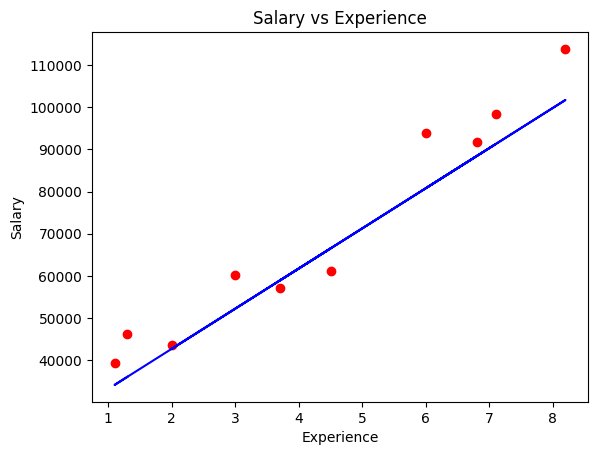

In [17]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()
